In [2]:
from google.colab import drive
drive.mount('/content/drive')

!gdown --id 1qCVYpb67RuzUbyrJ3w-ohtCf-tzZKTal
!gdown --id 1dW5SkCYIFbXmNe3xKv4EhrLPDPlXyIDy

def read_file(input_file_address):
    lines = []
    with open (input_file_address , 'r', encoding="UTF-8") as f :
        for line in f.readlines():
            if (len(line.split(' ')) > 3):
                lines.append(line)
    return lines

train_set = read_file('/content/train.txt')
test_set = read_file('/content/test.txt')

print(len(test_set))
print(len(train_set))


Mounted at /content/drive
Downloading...
From: https://drive.google.com/uc?id=1qCVYpb67RuzUbyrJ3w-ohtCf-tzZKTal
To: /content/train.txt
100% 9.87M/9.87M [00:00<00:00, 240MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dW5SkCYIFbXmNe3xKv4EhrLPDPlXyIDy
To: /content/test.txt
100% 5.80k/5.80k [00:00<00:00, 11.0MB/s]
108
188364


# Q1


In [ ]:
# The added number shows the number of guesses for each sentences
test_dataset = [
                "2 چون مشک سیه بود مرا هر دو",
                "1 گر خورد سوگند هم آن",
                "1 زانک نفس آشفته تر گردد از",
                "1 ازین زشت تر در جهان رنگ",
                "2 دوست در خانه و ما گرد",
                "1 شب‬‫ است‬ ‫و‬ ‫شمع‬ ‫و‬ ‫شراب‬ و"
                ]

#Calculate count of unigrams
def calculate_unigram(input_file_address):

    unigrams_dict = {}
    lines = read_file(input_file_address)
    for line in lines:
        line  = ' '.join(line.split())
        words = [word.strip() for word in line.split(' ')]
        for word in words:
            if word in unigrams_dict.keys():
                unigrams_dict[word] += 1
            else:
                unigrams_dict[word] = 1
    return dict(sorted(unigrams_dict.items(),
                       key=lambda item: item[1], reverse=True))

unigrams = calculate_unigram('/content/train.txt')

#Calculate count of bigrams
def calculate_bigram(input_file_address):


    bigrams_dict = {}
    lines = read_file(input_file_address)

    for line in lines:
        line  = ' '.join(line.split())
        words = [word.strip() for word in line.split(' ')]
        for i in range(len(words) - 1):
            bigram = (words[i],words[i + 1])
            if bigram in bigrams_dict.keys():
                bigrams_dict[bigram] += 1
            else:
                bigrams_dict[bigram] = 1
    return dict(sorted(bigrams_dict.items(),
                       key=lambda item: item[1], reverse=True))
    
bigrams = calculate_bigram('/content/train.txt')

mu = 0.01
p_background = 1/len(unigrams.items())

def complete_sentence(test_set: list):
    for sentence in test_set:
        new_dict = {}
        sentence = ' '.join(sentence.split())
        words = [word.strip() for word in sentence.split(' ')]
        number_of_guess = words[0]
        
        words = words[1:len(words)]
        
        for i in range(int(number_of_guess)):
            
            for key, value in bigrams.items():
                if key[0].strip() == words[len(words)-1].strip():

                    #bigram probability based on drichlet prior model
                    new_dict[key] = value + (mu * p_background)/unigrams.get(key[0]) + mu

            sorted_list = list(sorted(new_dict.items(), 
                                      key=lambda item: item[1], reverse=True))
            
            print(' '.join(words) + ' ' + sorted_list[0][0][1])

            #Add the word with the most probability to the sentence
            words = words + [sorted_list[0][0][1]]
        print('----------------')

complete_sentence(test_dataset)



چون مشک سیه بود مرا هر دو چشم
چون مشک سیه بود مرا هر دو چشم من
----------------
گر خورد سوگند هم آن را
----------------
زانک نفس آشفته تر گردد از آن
----------------
ازین زشت تر در جهان رنگ و
----------------
دوست در خانه و ما گرد و
دوست در خانه و ما گرد و از
----------------
شب‬‫ است‬ ‫و‬ ‫شمع‬ ‫و‬ ‫شراب‬ و از
----------------


# Q2

In [ ]:
import math 

def bigram_prob_drichlet_prior(test_set: list):

    # the probability of all sentences in test dataset
    total_probability = 0

    # the number of all words with frequencies in train dataset
    all_freq = sum(unigrams.values())

    #N in perplexity formula (number of words in test dataset)
    number_of_words = 0
    
    # parameter of model
    mu = 0.01

    # V vocabulary size of model (unique words in train dataset)
    vocalbulary_size = len(unigrams.items())
    
    # background probability for drichlet prior model
    p_background = 1/vocalbulary_size
    
    sentence_size = 0
    
    for sentence in test_set:
        sentence = ' '.join(sentence.split())
        words = [word.strip() for word in sentence.split(' ')]
        number_of_words = number_of_words + len(words) + 1
        sentence_size = sentence_size + 1
        
        # probability of first word
        sentence_probability = unigrams.get(words[0])/all_freq
        for i in range(len(words)-1):
            word = words[i]
            bigram = (words[i], words[i+1])

            if bigram not in bigrams.keys():
                bigram_count= 0
            else:
                bigram_count = bigrams.get(bigram)
            
            if word not in unigrams.keys():
                unigram_count = 0
            else:
                unigram_count = unigrams.get(word)

            # used logarithm base 2 for calculating sum of probability
            sentence_probability = sentence_probability + math.log2(((bigram_count + (mu * p_background)))/(unigram_count + mu))
        
        total_probability = total_probability + sentence_probability

    perplexity = math.pow(2, -1*(total_probability/number_of_words))
    print(f'Number of words in test set : {number_of_words}')
    print(f'Number of sentences in test set : {sentence_size}')
    return perplexity

perplexity = bigram_prob_drichlet_prior(test_set)
print(f'perplexity of model is : {perplexity}')

Number of words in test set : 872
Number of sentences in test set : 108
perplexity of model is : 2626.1926199715494


# Q3

In [3]:
# Extract sequences of 3-grams from corpus

# count of given words to predict the next word
window_size = 2

# length of sequence or n-gram
seq_length = window_size + 1

# store the n-grams in sequences list
sequences = list()

# extract a sentence of each 'seq_length' consecutive words from given sentences.
for sentence in train_set:
     line  = ' '.join(sentence.split())
     words = [word.strip() for word in line.split(' ')]
     for i in range(seq_length, len(words) + 1):
         seq = words[i-seq_length:i]
         line = ' '.join(seq)
         sequences.append(line)

print('Total Sequences: %d' % len(sequences))

Total Sequences: 930464


In [4]:
from keras.preprocessing.text import Tokenizer
# create the tokenizer and fit it on the input text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences)

# tokenize the sequences into encoded numbers
sequences = tokenizer.texts_to_sequences(sequences)
vocab_size = len(tokenizer.word_index) + 1


In [5]:
import numpy as np
from numpy import array
from sklearn.model_selection import train_test_split

sequences = array(sequences)

# split the sequence of N-grams into input (x) and output (y)
X, y = sequences[:,:-1], sequences[:,-1]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.04, random_state=42)


In [6]:
# The PlotLosses function, plots the validation and training loss function during the
#  training to give an insight of training the model
import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
  
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [7]:
import tensorflow as tf
import math

#Generator class 
class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return np.array(batch_x), np.array(batch_y)

batch_size = 1000
train_generator = CustomDataGen(X_train, y_train, batch_size)
validation_generator = CustomDataGen(X_validation, y_validation, batch_size)


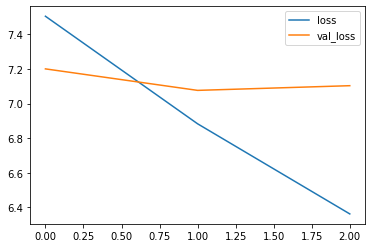

893/893 [==============================] - 622s 696ms/step - loss: 6.3618 - accuracy: 0.1034 - val_loss: 7.1035 - val_accuracy: 0.0898


In [8]:

# Load dependencies
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Flatten

# define model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=window_size, name ='Embedding-layer'))
model.add(Flatten())
model.add(Dense(int(vocab_size/10), activation='relu', name='hidden-layer'))
model.add(Dense(vocab_size, activation='softmax', name='output-layer'))

# print summary of model's structure:
print(model.summary())



EPOCHS = 3
checkpoint_filepath = "/content/drive/MyDrive/models/model1.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


# compile the model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(train_generator, 
          batch_size=batch_size, 
          epochs=EPOCHS, 
          steps_per_epoch=X_train.shape[0]/batch_size,
          validation_data=validation_generator,
          callbacks=[model_checkpoint_callback, plot_losses])

This model was overfitted, but because of the lack of resources I couldn't tune the model and train it again. So the predicted words for next part are also not good enough.

In [10]:
#predicting the next word for these sentences

test_dataset = [
                "چون مشک سیه بود مرا هر دو ",
                "گر خورد سوگند هم آن",
                "زانک نفس آشفته تر گردد از",
                "ازین زشت تر در جهان رنگ",
                "دوست در خانه و ما گرد",
                "شب‬‫ است‬ ‫و‬ ‫شمع‬ ‫و‬ ‫شراب‬ و"
                ]


sequences = list()

for sentence in test_dataset:
     line  = ' '.join(sentence.split())
     words = [word.strip() for word in line.split(' ')]
     seq = words[len(words)-2:len(words)]
     line = ' '.join(seq)
     sequences.append(line)

tokenizer.fit_on_texts(sequences)
sequences = tokenizer.texts_to_sequences(sequences)

sequences = array(sequences)
X = sequences[:,:]

# The model weights (that are considered the best) are loaded into the model.
best_model_path = '/content/drive/MyDrive/models/model1.h5'
model.load_weights(best_model_path)

predicted = model.predict(X)

# given the ID of word returns its corresponding word
def convert_ID_to_word(ID):   
  for word, index in tokenizer.word_index.items():
    if (index == ID).any() :
      return word
  return 

# given the input sentence as an array of word Ids, returns the string of sentence
def get_sentence_from_IDs(x):
  sent = ''
  for elem in x:
    sent+= convert_ID_to_word(elem) + ' '
  return sent

# print the test data with prediction of model
for i in range(X.shape[0]):
    print( get_sentence_from_IDs(X[i]) +' : '+convert_ID_to_word(np.argmax(predicted[i])))


هر دو  : جهان
هم آن  : را
گردد از  : آن
جهان رنگ  : و
ما گرد  : و
‫شراب‬ و  : در
